In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

In [22]:
df = pd.read_csv('OK FAIL DATE.csv')
df.head()

,Batch Status,Cycle End Time,DataLabel,Program Number
0,FAILED,2019-01-09 09:42:00,1,8
1,OK,2019-01-09 11:30:00,2,8
2,OK,2019-01-09 12:32:00,3,3
3,OK,2019-01-09 14:00:00,4,11
4,OK,2019-01-09 16:10:00,5,10


In [23]:
# relabel Emergency Failure in Batch status as FAILED
df['Batch Status'] = df['Batch Status'].replace('Emergency Failure', 'FAILED')

In [24]:
# no. of unique counts in batch status
df['Batch Status'].value_counts()

OK             1507
Maintenance     247
FAILED          106
Name: Batch Status, dtype: int64

In [25]:
# print a dataframe giving number of failed  OK and Maintenance batches in each program number 
df.groupby(['Program Number', 'Batch Status']).size().unstack().fillna(0)


Batch Status,FAILED,Maintenance,OK
Program Number,,,
1,5.0,159.0,0.0
2,13.0,88.0,0.0
3,2.0,0.0,15.0
4,1.0,0.0,3.0
5,3.0,0.0,20.0
6,0.0,0.0,3.0
7,1.0,0.0,2.0
8,7.0,0.0,70.0
9,1.0,0.0,3.0


In [26]:
# combine Program number 9 10 11 and label it as A
df['Program Number'] = df['Program Number'].replace([3,4,5,6,7,8,9, 10, 11,13,14,15,20,21], 'A')

In [27]:

df['Program Number'] = df['Program Number'].replace([12,16,17], 'B')

df['Program Number'] = df['Program Number'].replace([1,2], 'M')

In [28]:
# print unique values in program number 
df['Program Number'].unique()

array(['A', 'M', 'B'], dtype=object)

In [29]:
# if program number is M and batch status is FAILED then update the program number as A
df.loc[(df['Program Number'] == 'M') & (df['Batch Status'] == 'FAILED'), 'Program Number'] = 'A'

In [30]:
df.head()

,Batch Status,Cycle End Time,DataLabel,Program Number
0,FAILED,2019-01-09 09:42:00,1,A
1,OK,2019-01-09 11:30:00,2,A
2,OK,2019-01-09 12:32:00,3,A
3,OK,2019-01-09 14:00:00,4,A
4,OK,2019-01-09 16:10:00,5,A


In [31]:
# Convert 'Time' column to datetime format
df['Cycle End Time'] = pd.to_datetime(df['Cycle End Time'])

# Extract year from datetime and create a new column
df['Year'] = df['Cycle End Time'].dt.year


In [32]:
# # Function to calculate negative log-likelihood for given parameters
def neg_log_likelihood(p, a):
    
    initial_p = p
    neg_log_likelihood_val = 0
    prev_status = 0  # Initializing prev_status to 0 as per your description
    for status in df['Batch Status']:
        if status == 'FAILED': 
            neg_log_likelihood_val -= np.log(1 - p)
            p *= a 
        elif status == 'OK': 
            neg_log_likelihood_val -= np.log(p)
            p *= a  # Update p for next OK status
        elif status == 'Maintenance': 
            p = initial_p  # Reset p to initial value
        prev_status = status
    return neg_log_likelihood_val

In [33]:
import numpy as np

# Assuming a_values and p_values are defined as follows
a_values = np.arange(0.01, 1, 0.01)
p_values = np.arange(0.01, 1, 0.01)

# Initialize variables to store the best parameters for the entire dataset
min_neg_log_likelihood = float('inf')
best_params = None

# Iterate over all combinations of 'a' and 'p' for the entire dataset
for a in a_values:
    for p in p_values:
        # Calculate negative log-likelihood for current parameters
        current_neg_log_likelihood = neg_log_likelihood(p, a)

        # Check if current negative log-likelihood is smaller than minimum found so far
        if current_neg_log_likelihood < min_neg_log_likelihood:
            min_neg_log_likelihood = current_neg_log_likelihood
            best_params = (p, a)

# Output the best parameters for the entire dataset
print("Best Parameters (p, a):", best_params)


Best Parameters (p, a): (0.9600000000000001, 0.99)


In [16]:
# # Function to calculate negative log-likelihood for given parameters and year
# def neg_log_likelihood(p, a_dict, year):
#     initial_p = p
#     neg_log_likelihood_val = 0
#     prev_status = 0  # Initializing prev_status to 0 as per your description
#     for i, (status, data_year) in enumerate(zip(train_data['Batch Status'], train_data['Year'])):
#         if data_year != year:  # Skip data points not belonging to the current year
#             continue
        
#         if status == 'FAILED':
#             neg_log_likelihood_val -= np.log(1 - p)
#             p *= a_dict[train_data['Program Number'][i]]  # Update p using corresponding 'a' value
#         elif status == 'OK':
#             neg_log_likelihood_val -= np.log(p)
#             p *= a_dict[train_data['Program Number'][i]]  # Update p using corresponding 'a' value
#         elif status == 'Maintenance':
#             p = initial_p  # Reset p to initial value
#         prev_status = status
#     return neg_log_likelihood_val


In [20]:
# p_values = np.arange(0.5, 1, 0.01)
# a1_values = np.arange(0.5, 1, 0.01)
# a2_values = np.arange(0.5, 1, 0.01)
# a3_values = np.arange(0.5, 1, 0.01)

In [21]:
# # Initialize variables to store the best parameters for each year
# best_params_by_year = {}

# # Iterate over unique years
# for year in [2019, 2020, 2021]:  # Assuming these are the years of interest
#     # Initialize variables to store the minimum negative log-likelihood value and corresponding parameters for the current year
#     min_neg_log_likelihood_year = float('inf')
#     best_params_year = None
    
#     # Iterate over all combinations of a1, a2, and p for the current year
#     for a1 in a1_values:
#         for a2 in a2_values:
#             for p in p_values:
#                 # Define the 'a' values dictionary for the current combination
#                 a_values = {'A': a1, 'B': a2}

#                 # Calculate negative log-likelihood for current parameters and current year
#                 current_neg_log_likelihood = neg_log_likelihood(p, a_values, year)

#                 # Check if current negative log-likelihood is smaller than minimum found so far for the current year
#                 if current_neg_log_likelihood < min_neg_log_likelihood_year:
#                     min_neg_log_likelihood_year = current_neg_log_likelihood
#                     best_params_year = (p, a_values)
    
#     # Store the best parameters for the current year
#     best_params_by_year[year] = best_params_year

# # Output the best parameters for each year
# for year, params in best_params_by_year.items():
#     print(f"Year: {year}, Best Parameters (p, a_values): {params}")


Year: 2019, Best Parameters (p, a_values): (0.7800000000000002, {'A': 0.9900000000000004, 'B': 0.9900000000000004})
Year: 2020, Best Parameters (p, a_values): (0.9600000000000004, {'A': 0.9900000000000004, 'B': 0.9900000000000004})
Year: 2021, Best Parameters (p, a_values): (0.5, {'A': 0.5, 'B': 0.5})


In [19]:

# # # Output the minimum negative log-likelihood value and corresponding parameters
# print("Minimum Negative Log-Likelihood:", min_neg_log_likelihood)
# print("Best Parameters (p, a):", best_params)


Minimum Negative Log-Likelihood: 359.3315898567369
Best Parameters (p, a): (0.9500000000000001, {'A': 0.99, 'B': 0.99})


In [49]:
# Initialize a new column 'Probability' with initial values
df['Probability'] = 0
a = best_params[1]
p = best_params[0]
initial_p = p
# make a new column 'Probability' and fill it with the probability values and reset the probability value to initial value when maintenance is encountered else keep multiplying the probability value with a
for i, status in enumerate(df['Batch Status']):
    if status == 'FAILED':
        df['Probability'][i] = p
        p *= a
    elif status == 'OK':
        df['Probability'][i] = p
        p *= a
    elif status == 'Maintenance':
        p = initial_p
        df['Probability'][i] = p

C:\Users\91751\AppData\Local\Temp\ipykernel_1528\2968149326.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Probability'][i] = p


In [50]:
# print the dataframe
df.head()

,Batch Status,Cycle End Time,DataLabel,Program Number,Year,Probability,Predicted Batch Status
0,FAILED,2019-01-09 09:42:00,1,A,2019,0.960000,OK
1,OK,2019-01-09 11:30:00,2,A,2019,0.950400,OK
2,OK,2019-01-09 12:32:00,3,A,2019,0.940896,OK
3,OK,2019-01-09 14:00:00,4,A,2019,0.931487,OK
4,OK,2019-01-09 16:10:00,5,A,2019,0.922172,OK


In [51]:
print(df[['Batch Status', 'Probability']])

     Batch Status  Probability
0          FAILED     0.960000
1              OK     0.950400
2              OK     0.940896
3              OK     0.931487
4              OK     0.922172
...           ...          ...
1855           OK     0.817399
1856  Maintenance     0.960000
1857           OK     0.960000
1858           OK     0.950400
1859           OK     0.940896

[1860 rows x 2 columns]


<AxesSubplot:>

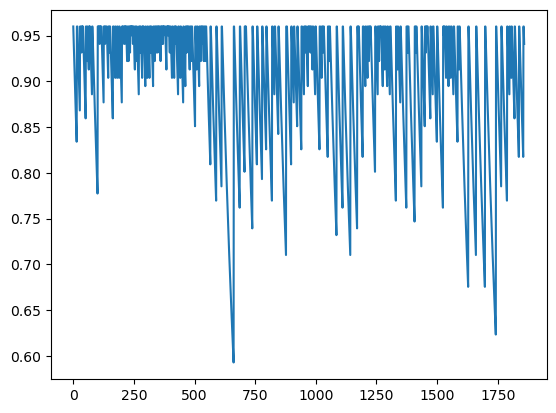

In [52]:
df['Probability'].plot()

In [53]:
# print batches with Batch status as Maintenance and their corresponding probability values
df[df['Batch Status'] == 'Maintenance'][['Batch Status', 'Probability']]


,Batch Status,Probability
15,Maintenance,0.96
16,Maintenance,0.96
28,Maintenance,0.96
29,Maintenance,0.96
30,Maintenance,0.96
...,...,...
1799,Maintenance,0.96
1807,Maintenance,0.96
1820,Maintenance,0.96
1838,Maintenance,0.96


In [54]:
#  take a threshold value and if the probability is less than threshold then it is failed
# make a new row in test data with the new batch status and compare this with the actual batch status and get the accuracy
# threshold = 0.8
# vary threshold between 0.8 and 1 such that the accuracy is maximum
threshold_values = np.arange(0.8, 1, 0.01)
accuracy_values = []
for threshold in threshold_values:
    df['Predicted Batch Status'] = np.where(df['Probability'] < threshold, 'FAILED', 'OK')
    accuracy = (df['Batch Status'] == df['Predicted Batch Status']).mean()
    accuracy_values.append(accuracy)

# Find the threshold value that gives the maximum accuracy
best_threshold = threshold_values[np.argmax(accuracy_values)]
best_accuracy = max(accuracy_values)
# Output the best threshold value and corresponding accuracy
print("Best Threshold:", best_threshold)
print("Best Accuracy:", best_accuracy)


Best Threshold: 0.8
Best Accuracy: 0.7043010752688172


In [55]:
# get all the below values for the best threshold
df['Predicted Batch Status'] = np.where(df['Probability'] < best_threshold, 'FAILED', 'OK')
# get the confusion matrix
confusion_matrix = pd.crosstab(df['Batch Status'], df['Predicted Batch Status'])
print("Confusion Matrix:")
print(confusion_matrix)
# get the precision and recall
precision = confusion_matrix.loc['FAILED', 'FAILED'] / confusion_matrix['FAILED'].sum()
recall = confusion_matrix.loc['FAILED', 'FAILED'] / confusion_matrix.loc['FAILED'].sum()
print("Precision:", precision)
print("Recall:", recall)
# get the f1 score
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score:", f1_score)


Confusion Matrix:
Predicted Batch Status  FAILED    OK
Batch Status                        
FAILED                       3   103
Maintenance                  0   247
OK                         200  1307
Precision: 0.014778325123152709
Recall: 0.02830188679245283
F1 Score: 0.019417475728155338


In [60]:
# keep threshold as 0.5 to 1 and get the accuracy values and corresponding confusion matrix
threshold_values = np.arange(0.5, 1, 0.1)
accuracy_values = []
confusion_matrices = []
for threshold in threshold_values:
    df['Predicted Batch Status'] = np.where(df['Probability'] < threshold, 'FAILED', 'OK')
    accuracy = (df['Batch Status'] == df['Predicted Batch Status']).mean()
    accuracy_values.append(accuracy)
    confusion_matrix = pd.crosstab(df['Batch Status'], df['Predicted Batch Status'])
    confusion_matrices.append(confusion_matrix)


# print the accuracy values and confusion matrices
for threshold, accuracy, confusion_matrix in zip(threshold_values, accuracy_values, confusion_matrices):
    print(f"Threshold: {threshold}, Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(confusion_matrix)
    print()

Threshold: 0.5, Accuracy: 0.8102150537634408
Confusion Matrix:
Predicted Batch Status    OK
Batch Status                
FAILED                   106
Maintenance              247
OK                      1507

Threshold: 0.6, Accuracy: 0.8091397849462365
Confusion Matrix:
Predicted Batch Status  FAILED    OK
Batch Status                        
FAILED                       0   106
Maintenance                  0   247
OK                           2  1505

Threshold: 0.7, Accuracy: 0.7903225806451613
Confusion Matrix:
Predicted Batch Status  FAILED    OK
Batch Status                        
FAILED                       0   106
Maintenance                  0   247
OK                          37  1470

Threshold: 0.7999999999999999, Accuracy: 0.7043010752688172
Confusion Matrix:
Predicted Batch Status  FAILED    OK
Batch Status                        
FAILED                       3   103
Maintenance                  0   247
OK                         200  1307

Threshold: 0.8999999999999999

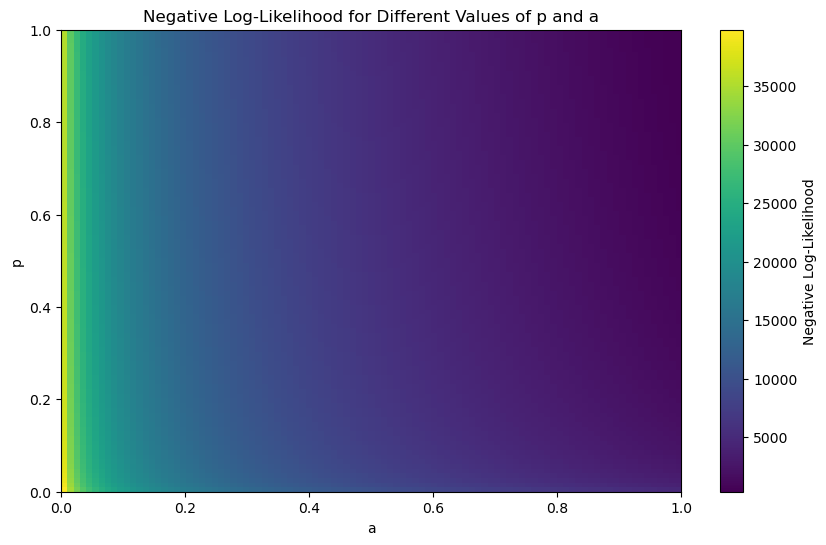

In [10]:
# can you print the df using values at each particular a and p value from 0.01 to 1?
# Iterate over all combinations of a and p and plot the output values on a scipy plot
p_values = np.arange(0.01, 1, 0.01)
a_values = np.arange(0.01, 1, 0.01)
neg_log_likelihood_values = np.zeros((len(p_values), len(a_values)))
# plot the values of the negative log likelihood for each combination of p and a
for i, p in enumerate(p_values):
    for j, a in enumerate(a_values):
        neg_log_likelihood_values[i, j] = neg_log_likelihood(p, a)

plt.figure(figsize=(10, 6))
plt.imshow(neg_log_likelihood_values, extent=(0, 1, 0, 1), aspect='auto', origin='lower')
plt.colorbar(label='Negative Log-Likelihood')
plt.xlabel('a')
plt.ylabel('p')
plt.title('Negative Log-Likelihood for Different Values of p and a')
plt.show()

In [7]:
# print minimum negative log likelihood value and corresponding parameters
print("Minimum Negative Log-Likelihood:", min_neg_log_likelihood)
print("Best Parameters (p, a):", best_params)


Minimum Negative Log-Likelihood: 472.0766430934924
Best Parameters (p, a): (0.9600000000000001, 0.99)


In [8]:
# Use scipy's minimize function to find the optimal parameters
initial_guess = [0.5, 0.5]  # Initial guess for p and a
# bounds for x are between 0 and 1
bounds = [(0, 1), (0, 1)]
# Use Nelder-Mead method for optimization
result = minimize(lambda x: neg_log_likelihood(*x), initial_guess, bounds=bounds, method='Nelder-Mead')
# Output the optimal parameters
# round to 2 decimals
optimal_params = np.round(result.x, 2)
print("Optimal Parameters (p, a):", optimal_params)


Optimal Parameters (p, a): [0.93 1.  ]


C:\Users\91751\AppData\Local\Temp\ipykernel_19376\3951318626.py:9: RuntimeWarning: divide by zero encountered in log
  neg_log_likelihood_val -= np.log(1 - p)


In [11]:
# now i want to predict the next 10 values of the batch status
# Use the optimal parameters to predict the next 10 values of the batch status
p, a = optimal_params
predicted_status = []
for i in range(10):
    if np.random.rand() < p:
        predicted_status.append('OK')
        p *= a
    else:
        predicted_status.append('FAILED')

print("Predicted Status for Next 10 Batches:", predicted_status)


Predicted Status for Next 10 Batches: ['OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'FAILED']
